In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random


In [ ]:
# Read the data from the file
with open('rulesWSharderlong.txt', 'r') as file:
    lines = file.readlines()

In [ ]:
df = pd.DataFrame(columns=['rule', 'min', 'max', 'mean_all', 'std_all',
                                 'geq_062', 'mean_062', 'std_062'])

# Process each line
for line in lines:
    # Check if the line is empty and skip it
    if line.strip() == "":
        continue

    # Split the line into components and convert them to floats, excluding the last part
    parts = line.strip().split(',')
    rule = parts[0]  # First part is the rule name
    samples = [float(x) for x in parts[1:]]  # The rest are the samples, excluding the last part

    samples062 = [x for x in samples if x >= 0.62] # If you flip fair coin, 0.62 corresponds to 1% chance

    # Calculate statistics
    min_val = min(samples)
    max_val = max(samples)
    mean_val = np.mean(samples)
    std_val = np.std(samples)
    percentage_greater_than_06 = (len(samples062) / len(samples))
    if (percentage_greater_than_06 > 0):
      mean_06 = np.mean(samples062)
      std_06 = np.std(samples062)
    else:
      mean_06 = 0
      std_06 = 0

    new_row = {
        'rule': rule,
        'min': min_val,
        'max': max_val,
        'mean_all': mean_val,
        'std_all': std_val,
        'geq_062': percentage_greater_than_06,
        'mean_062': mean_06,
        'std_062': std_06
    }

    new_row_df = pd.DataFrame([new_row])

    # Append the new row to the empty DataFrame
    df = pd.concat([df, new_row_df], ignore_index=True)


df

,rule,min,max,mean_all,std_all,geq_062,mean_062,std_062
0,0,0.50,0.50,0.5000,0.000000,0.00,0,0
1,1,0.45,0.62,0.5117,0.031719,0.02,0.62,0.0
2,2,0.44,0.64,0.5081,0.030649,0.04,0.625,0.00866
3,3,0.37,0.67,0.5112,0.041407,0.03,0.643333,0.018856
4,4,0.43,0.58,0.5048,0.024145,0.00,0,0
...,...,...,...,...,...,...,...,...
251,251,0.50,0.50,0.5000,0.000000,0.00,0,0
252,252,0.48,0.52,0.5000,0.003464,0.00,0,0
253,253,0.50,0.50,0.5000,0.000000,0.00,0,0
254,254,0.50,0.50,0.5000,0.000000,0.00,0,0


In [ ]:
# Define thresholds for 'mean_val' to categorize into groups
geq_062_bins = [0, 0.3, 0.6, 0.7, 1]
geq_062_labels = ['Random', 'Mostly Random', 'Learning', 'Learning well']

# Categorize 'mean_val' into groups
df['geq_062_group'] = pd.cut(df['geq_062'], bins=geq_062_bins, labels=geq_062_labels, include_lowest=True)

In [ ]:
# Define thresholds for 'mean_val' to categorize into groups
mean_062_bins = [0, 0.7, 1]
mean_062_labels = ['Low', 'High']

# Categorize 'mean_val' into groups
df['mean_062_group'] = pd.cut(df['mean_062'], bins=mean_062_bins, labels=mean_062_labels, include_lowest=True)

In [ ]:
# Group by 'mean_val_group' and 'std_val_group', then list the rules
grouped_rules = df.groupby(['geq_062_group', 'mean_062_group'])['rule'].apply(list).reset_index(name='rules')
grouped_rules['rules_length'] = grouped_rules['rules'].apply(lambda x: len(x) if isinstance(x, list) else 0)

grouped_rules

,geq_062_group,mean_062_group,rules,rules_length
0,Random,Low,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",253
1,Random,High,"[97, 154, 240]",3
2,Mostly Random,Low,NaN,0
3,Mostly Random,High,NaN,0
4,Learning,Low,NaN,0
5,Learning,High,NaN,0
6,Learning well,Low,NaN,0
7,Learning well,High,NaN,0


In [ ]:
def plotHistogram(rules):
    if not isinstance(rules, list):
        print("There are no rules for this combination")
        return

    if len(rules) > 5:
        rules = random.sample(rules, 5)

    # Create a figure and a set of subplots
    fig, axs = plt.subplots(nrows=1, ncols=len(rules), figsize=(20, 4))  # Adjust figsize as needed
    count = 0

    # Process each line
    for line in lines:
        # Check if the line is empty and skip it
        if line.strip() == "":
            continue

        # Split the line into components and convert them to floats, excluding the last part
        parts = line.strip().split(',')
        rule = parts[0]  # First part is the rule name

        if rule in rules:
            samples = [float(x) for x in parts[1:]]  # The rest are the samples, excluding the last part

            if len(rules) == 1:
                # Plot the first histogram
                axs.hist(samples, bins=21, alpha=0.7, label=f'Rule {rule}', range=(0, 1))
                axs.set_title(f'Rule {rule}')
                # Set plot title and labels

                axs.set_xlabel('Accuracy')
                axs.set_ylabel('Frequency')
                axs.set_xlim(0, 1)  # Ensure x-axis is limited to 0-1
            else:
                # Plot the first histogram
                axs[count].hist(samples, bins=21, alpha=0.7, label=f'Rule {rule}', range=(0, 1))
                axs[count].set_title(f'Rule {rule}')
                # Set plot title and labels

                axs[count].set_xlabel('Accuracy')
                axs[count].set_ylabel('Frequency')
                axs[count].set_xlim(0, 1)  # Ensure x-axis is limited to 0-1

            count += 1



    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

Random Low


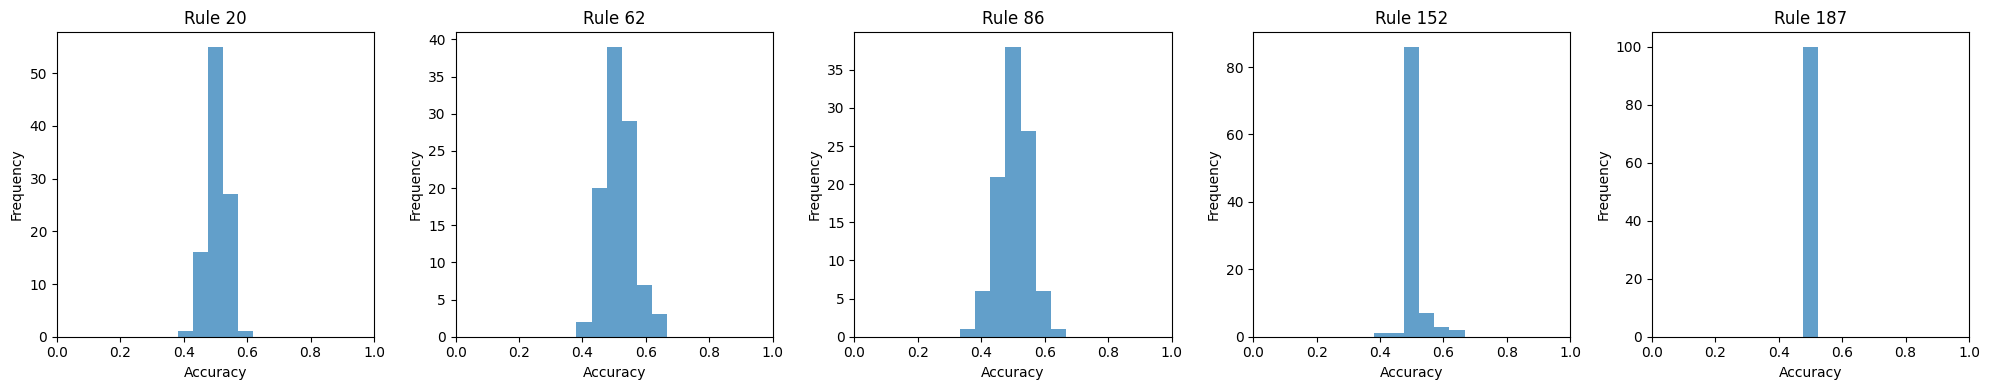

Random High


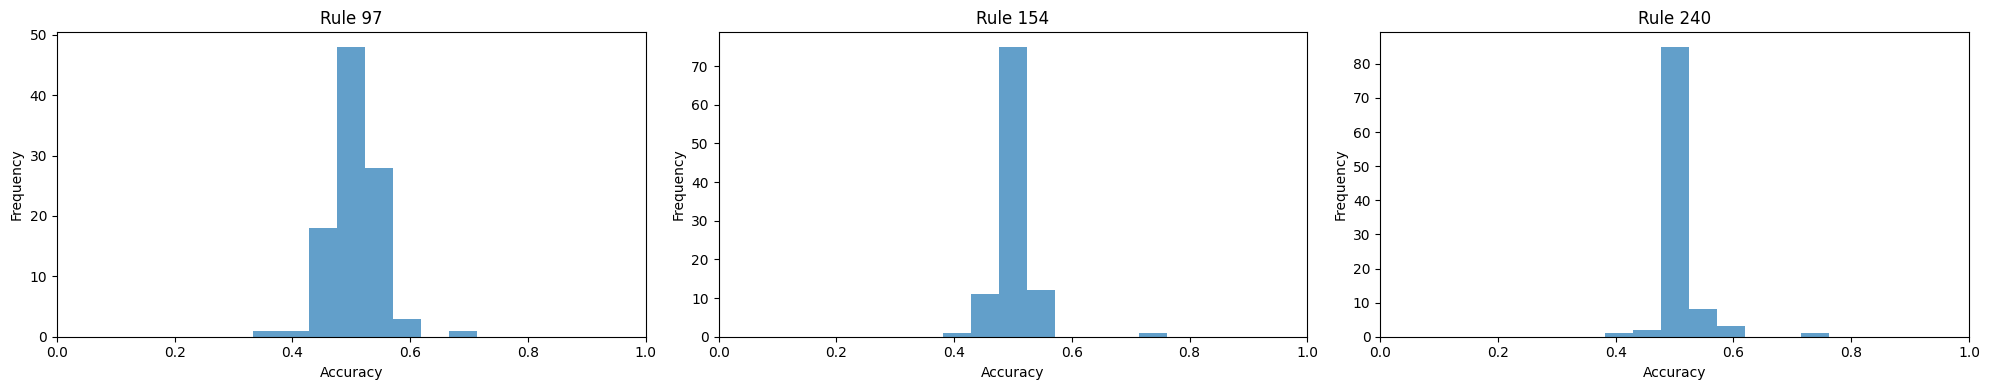

Mostly Random Low
There are no rules for this combination
Mostly Random High
There are no rules for this combination
Learning Low
There are no rules for this combination
Learning High
There are no rules for this combination
Learning well Low
There are no rules for this combination
Learning well High
There are no rules for this combination


In [ ]:
# Assuming 'grouped_df' is your DataFrame and it has a 'rules' column with lists
for index, row in grouped_rules.iterrows():
    print(row['geq_062_group'], row['mean_062_group'])

    plotHistogram(row['rules'])

In [ ]:
# Read the data from the file
with open('distribution.txt', 'r') as file:
    lines = file.readlines()

In [ ]:
def moving_average(data, window_size):
    cumsum_vec = np.cumsum(np.insert(data, 0, 0))
    ma_vec = (cumsum_vec[window_size:] - cumsum_vec[:-window_size]) / window_size
    # For the edges, you can just repeat the first and last average calculated for simplicity,
    # or handle it differently based on your requirements
    return np.concatenate(([ma_vec[0]]*2, ma_vec, [ma_vec[-1]]*2))

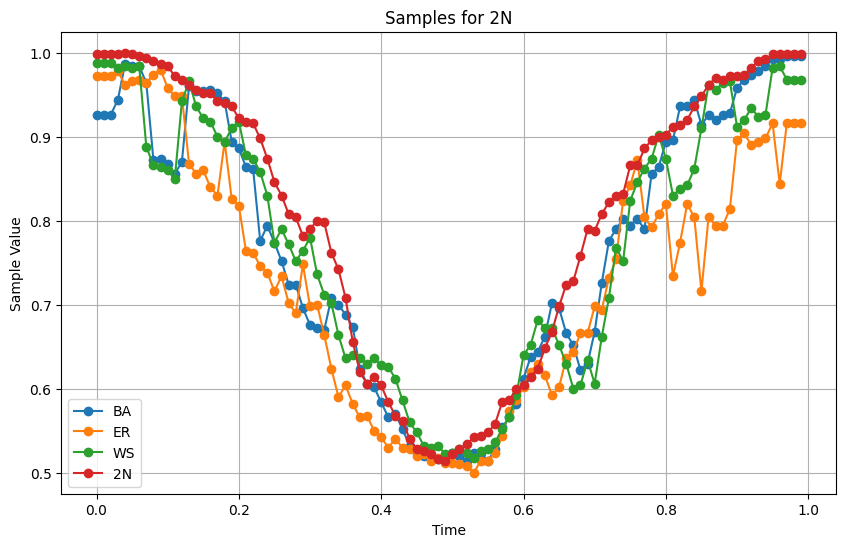

In [ ]:
plt.figure(figsize=[10, 6])  # Create a new figure with a specified size

# Process each line
for line in lines:
    # Check if the line is empty and skip it
    if line.strip() == "":
        continue

    # Split the line into components and convert them to floats, excluding the last part
    parts = line.strip().split(',')
    topology = parts[0]  # First part is the rule name
    samples = [float(x) for x in parts[1:]]  # The rest are the samples, excluding the last part

    x_values = np.linspace(0, 0.99, 100)

    window_size = 5

    # Compute the moving average
    average_samples = moving_average(samples, window_size)
    # Plotting

    plt.plot(x_values, average_samples, '-o', label=topology)  # Plot samples against x_values

plt.title(f'Samples for {topology}')  # Title of the plot
plt.xlabel('Time')  # Label for the x-axis
plt.ylabel('Sample Value')  # Label for the y-axis
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.show()  # Display the plot


In [5]:
# Correcting the data parsing

# Reinitialize lists to hold the corrected data
ids_corrected = []
data_corrected = []

# Re-read and correctly process the file
with open('RNXBA2B.txt', 'r') as file:
    for line in file:
        # Splitting by comma and then stripping spaces
        parts = [part.strip() for part in line.strip().split(',')]
        if parts:
            # Add the first part (ID) to ids_corrected
            ids_corrected.append(parts[0])
            # Add the rest (converted to floats) to data_corrected
            data_corrected.append([float(x) for x in parts[1:]])

# Convert lists to numpy arrays
ids_corrected = np.array(ids_corrected)
data_corrected = np.array(data_corrected)

# Display the shapes and first few entries for verification
print(f"Corrected data shape: {data_corrected.shape}")
print(f"First 5 IDs: {ids_corrected[:5]}")
print(f"First 5 rows of corrected data:\n{data_corrected[:5, :5]}")  # Show some of the data for verification


Corrected data shape: (101, 256)
First 5 IDs: ['0' '0' '1' '2' '3']
First 5 rows of corrected data:
[[0.5  0.46 0.74 0.68 0.5 ]
 [0.5  0.53 0.5  0.6  0.5 ]
 [0.5  0.5  0.5  0.74 0.51]
 [0.5  0.44 0.5  0.5  0.51]
 [0.5  0.49 0.5  1.   0.49]]


In [6]:
import numpy as np
import pandas as pd

# Assuming 'ids_corrected' and 'data_corrected' are already defined from your file reading
num_graphs, num_rules = data_corrected.shape
rule_ids = np.arange(1, num_rules + 1)  # Assuming rule IDs start from 1 to number of rules

# Flatten the matrix and pair each accuracy with its graph ID and rule ID
all_pairs = [(graph_id, rule_id, data_corrected[graph_index, rule_index])
             for graph_index, graph_id in enumerate(ids_corrected)
             for rule_index, rule_id in enumerate(rule_ids)]

# Convert the list of tuples into a DataFrame for easier sorting and handling
pairs_df = pd.DataFrame(all_pairs, columns=['Graph ID', 'Rule ID', 'Accuracy'])

# Sort the DataFrame by accuracy from best to worst
sorted_pairs_df = pairs_df.sort_values(by='Accuracy', ascending=False)

# Reset index after sorting
sorted_pairs_df.reset_index(drop=True, inplace=True)

# Display or save the sorted table
print(sorted_pairs_df)

# If you want to save this to a CSV file:
sorted_pairs_df.to_csv('sorted_accuracy_pairs.csv', index=False)

      Graph ID  Rule ID  Accuracy
0            5      232      1.00
1           18        3      1.00
2           46      232      1.00
3           18       67      1.00
4           30       35      1.00
...        ...      ...       ...
25851       25      209      0.31
25852       40      246      0.31
25853       28        2      0.29
25854       25       81      0.29
25855       16      176      0.26

[25856 rows x 3 columns]


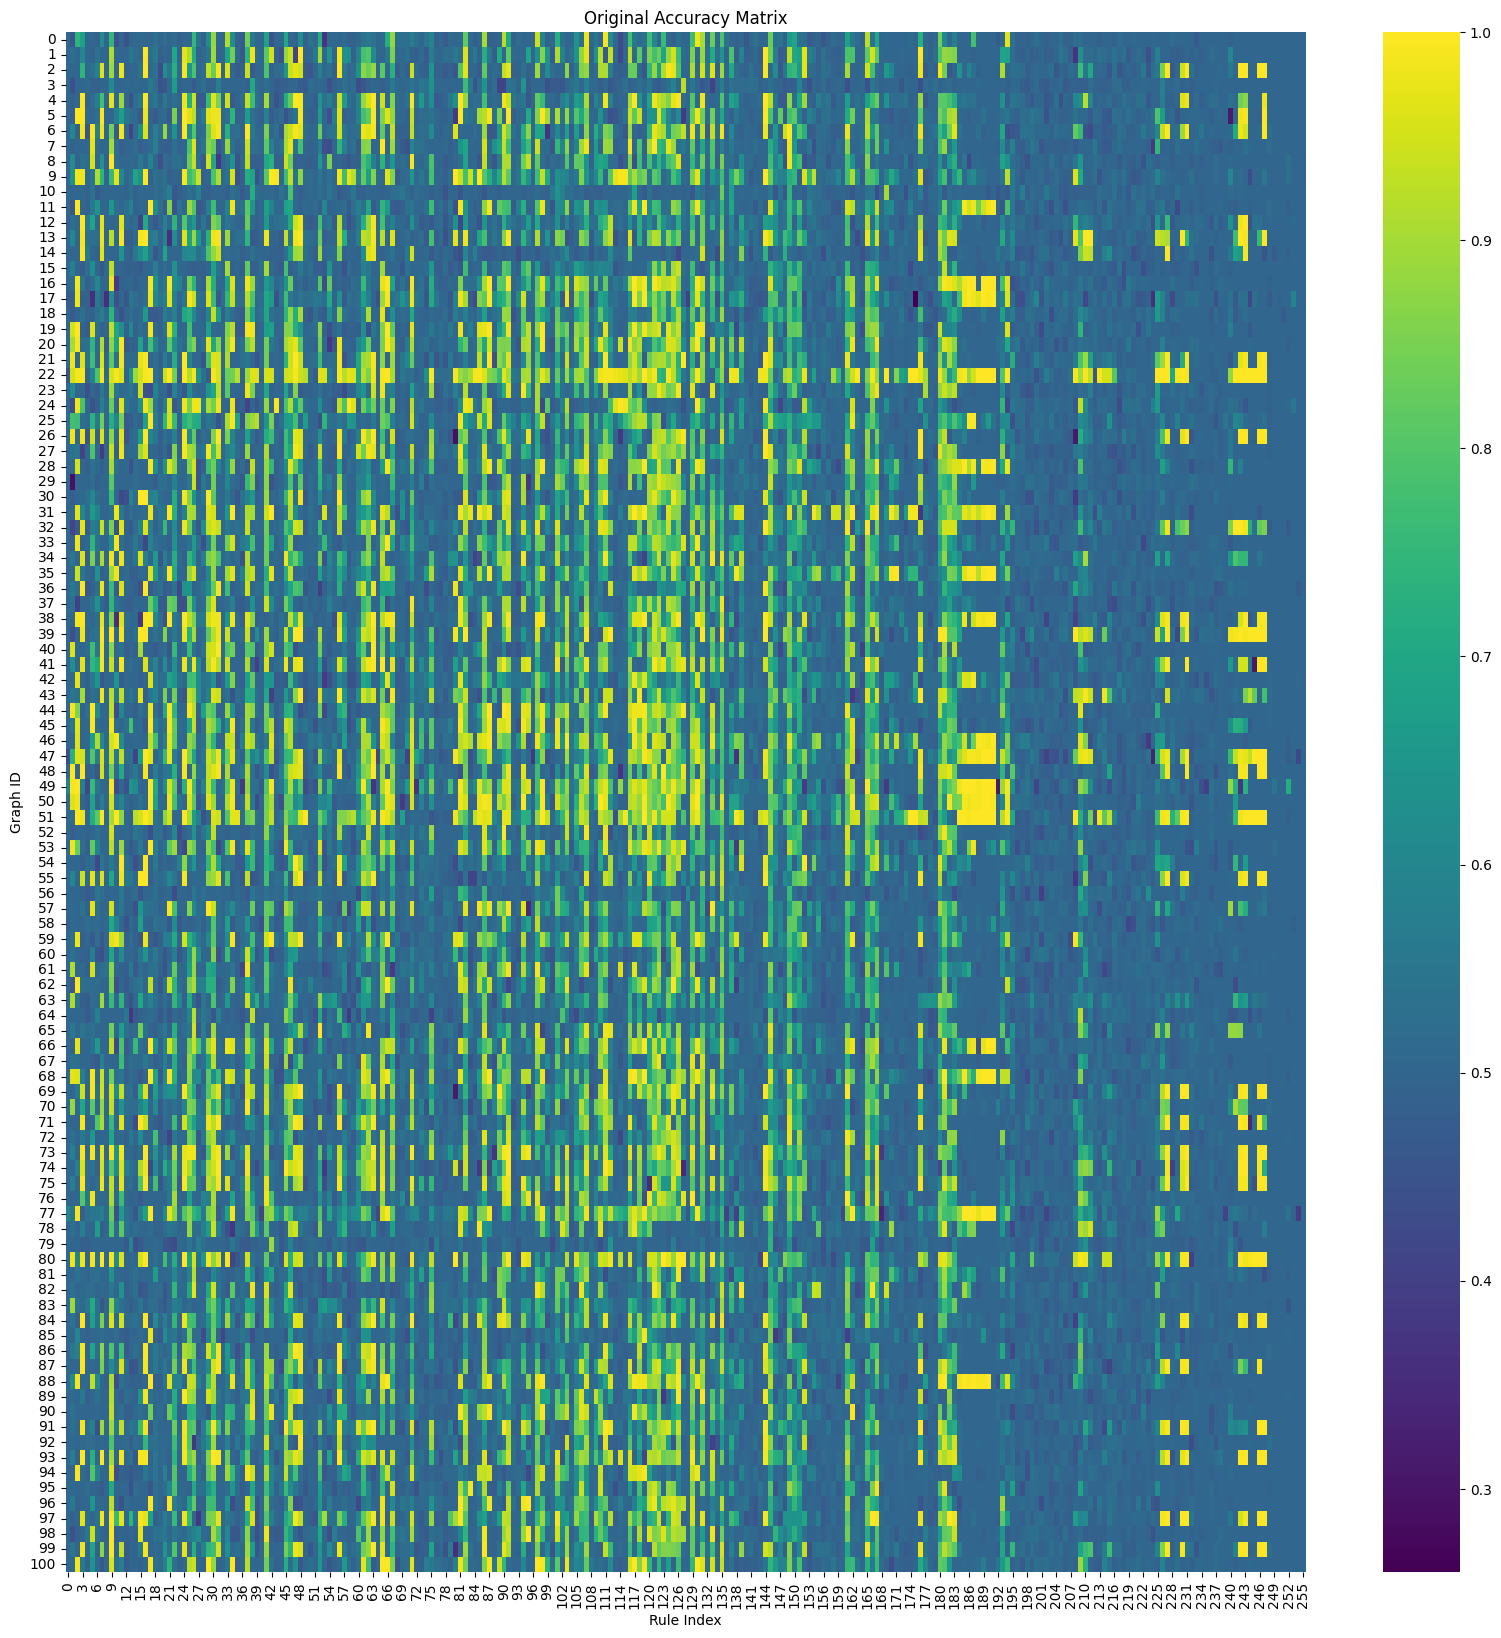

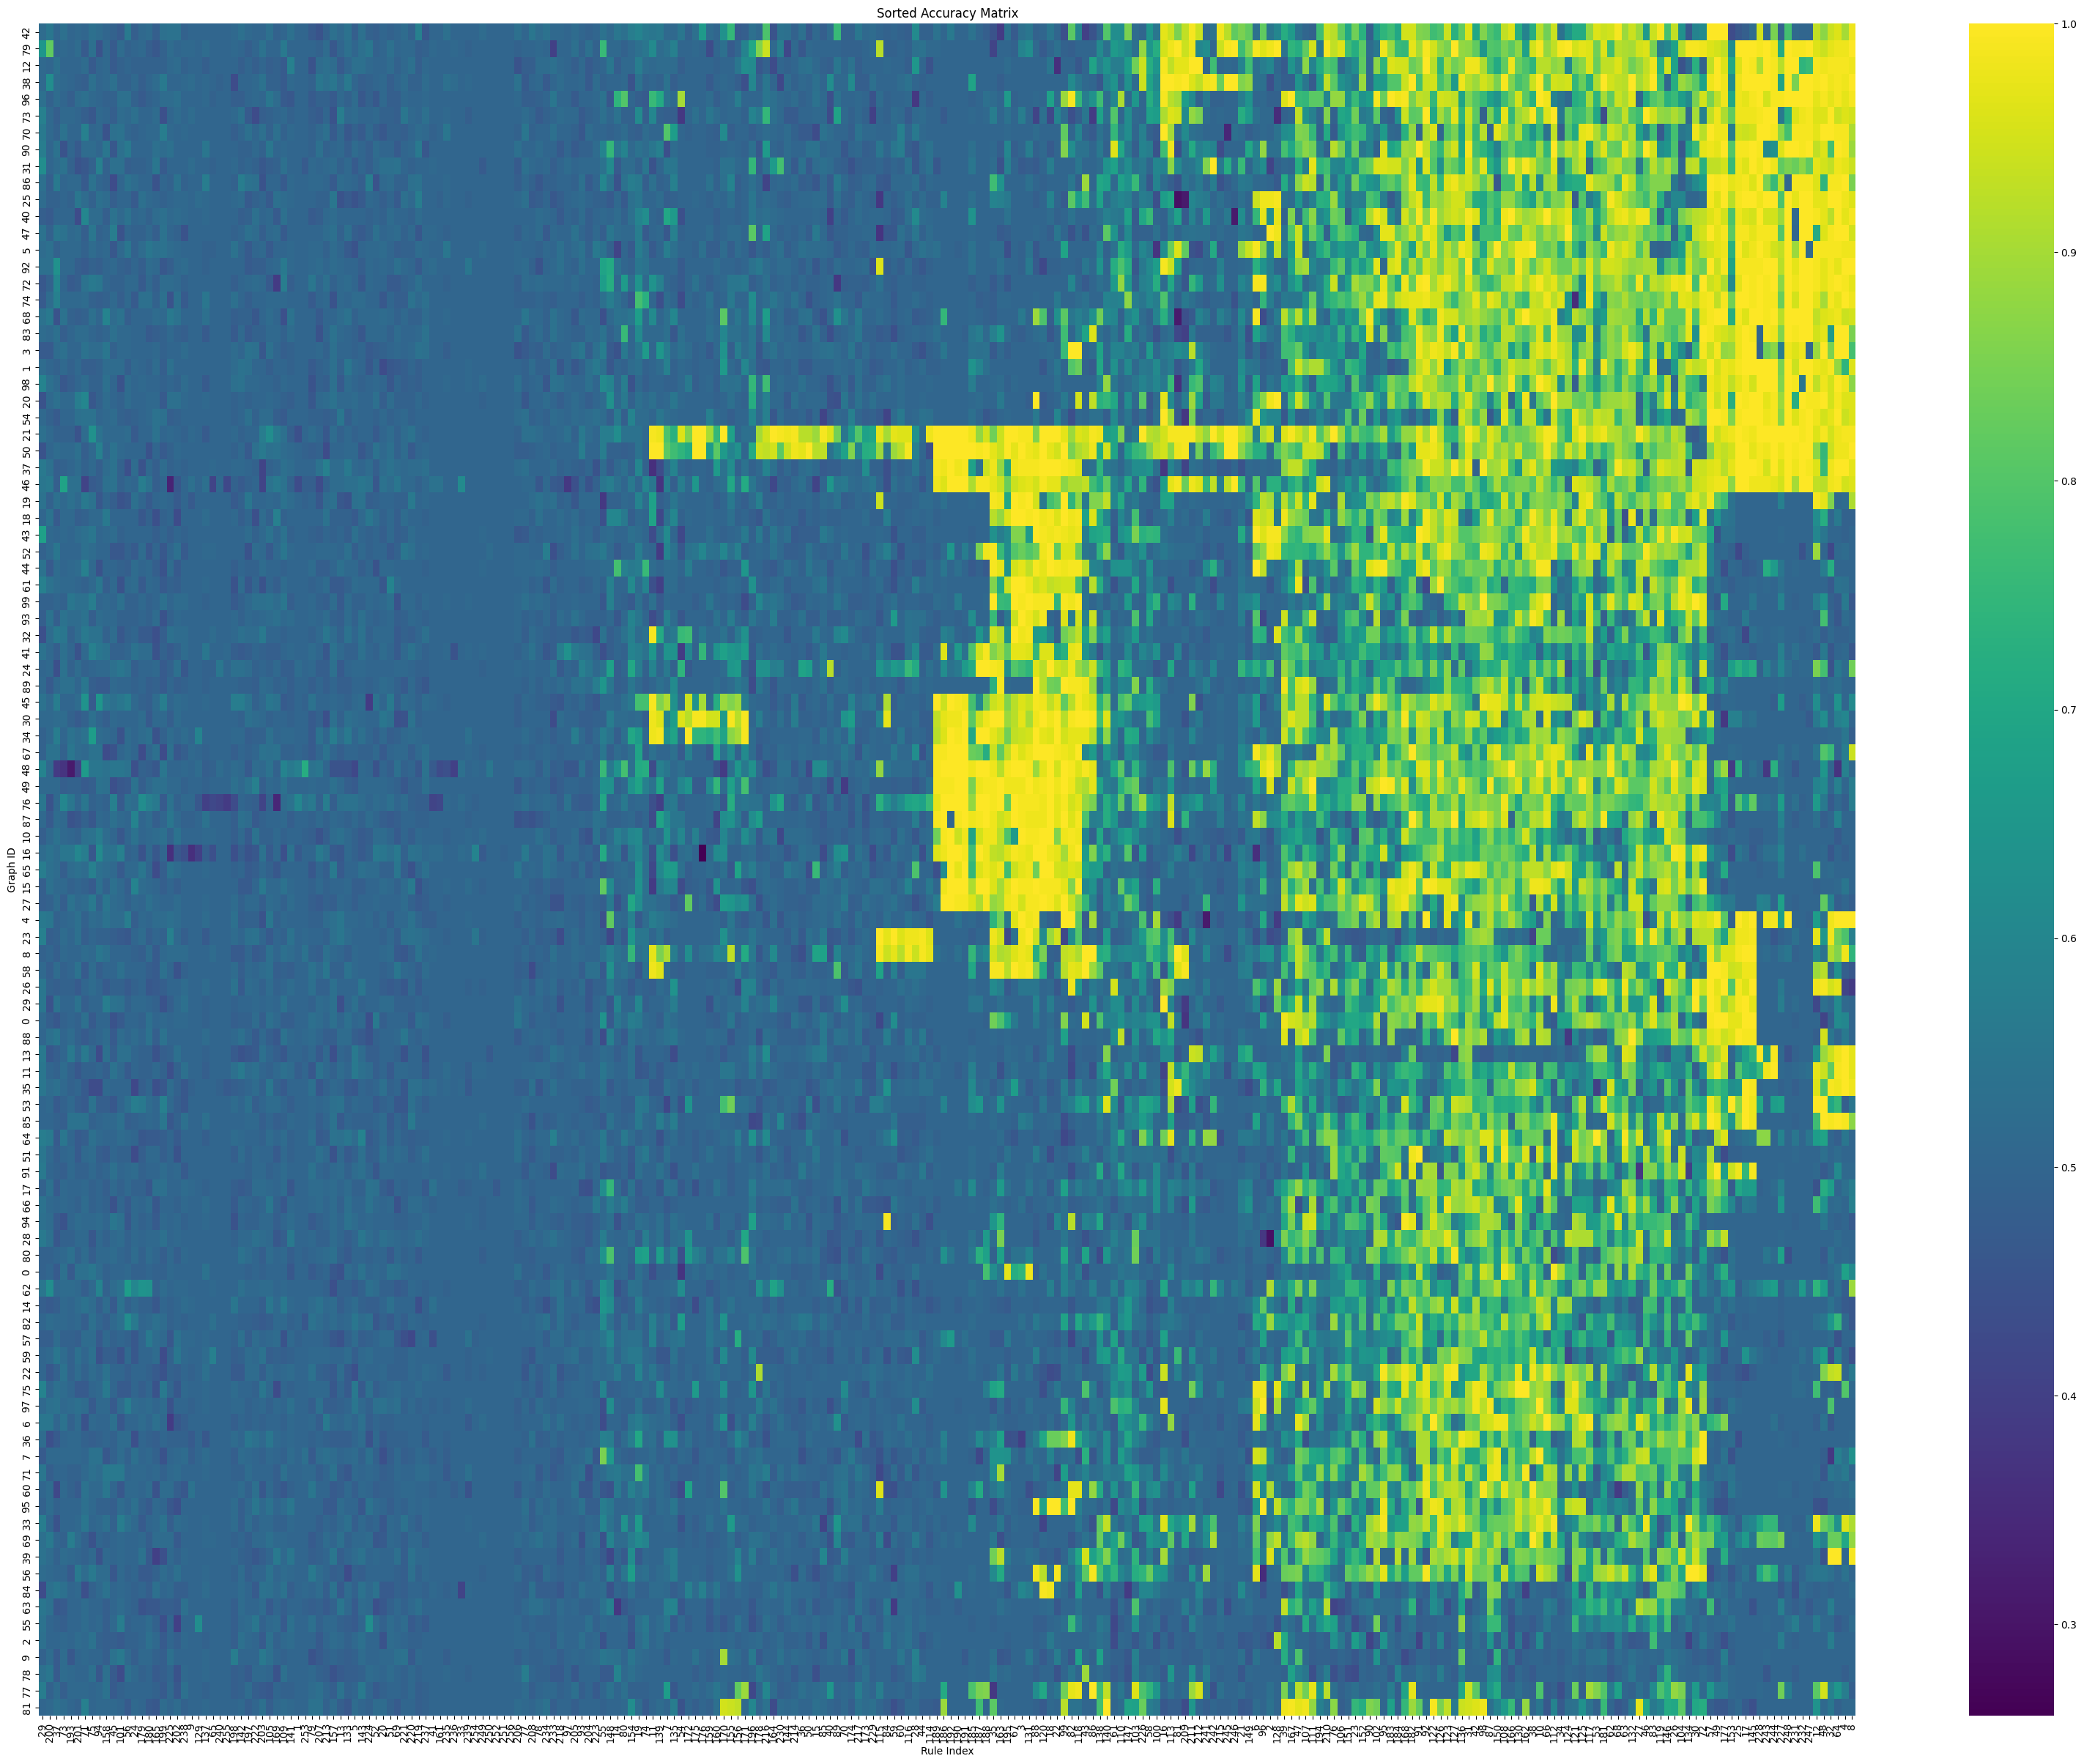

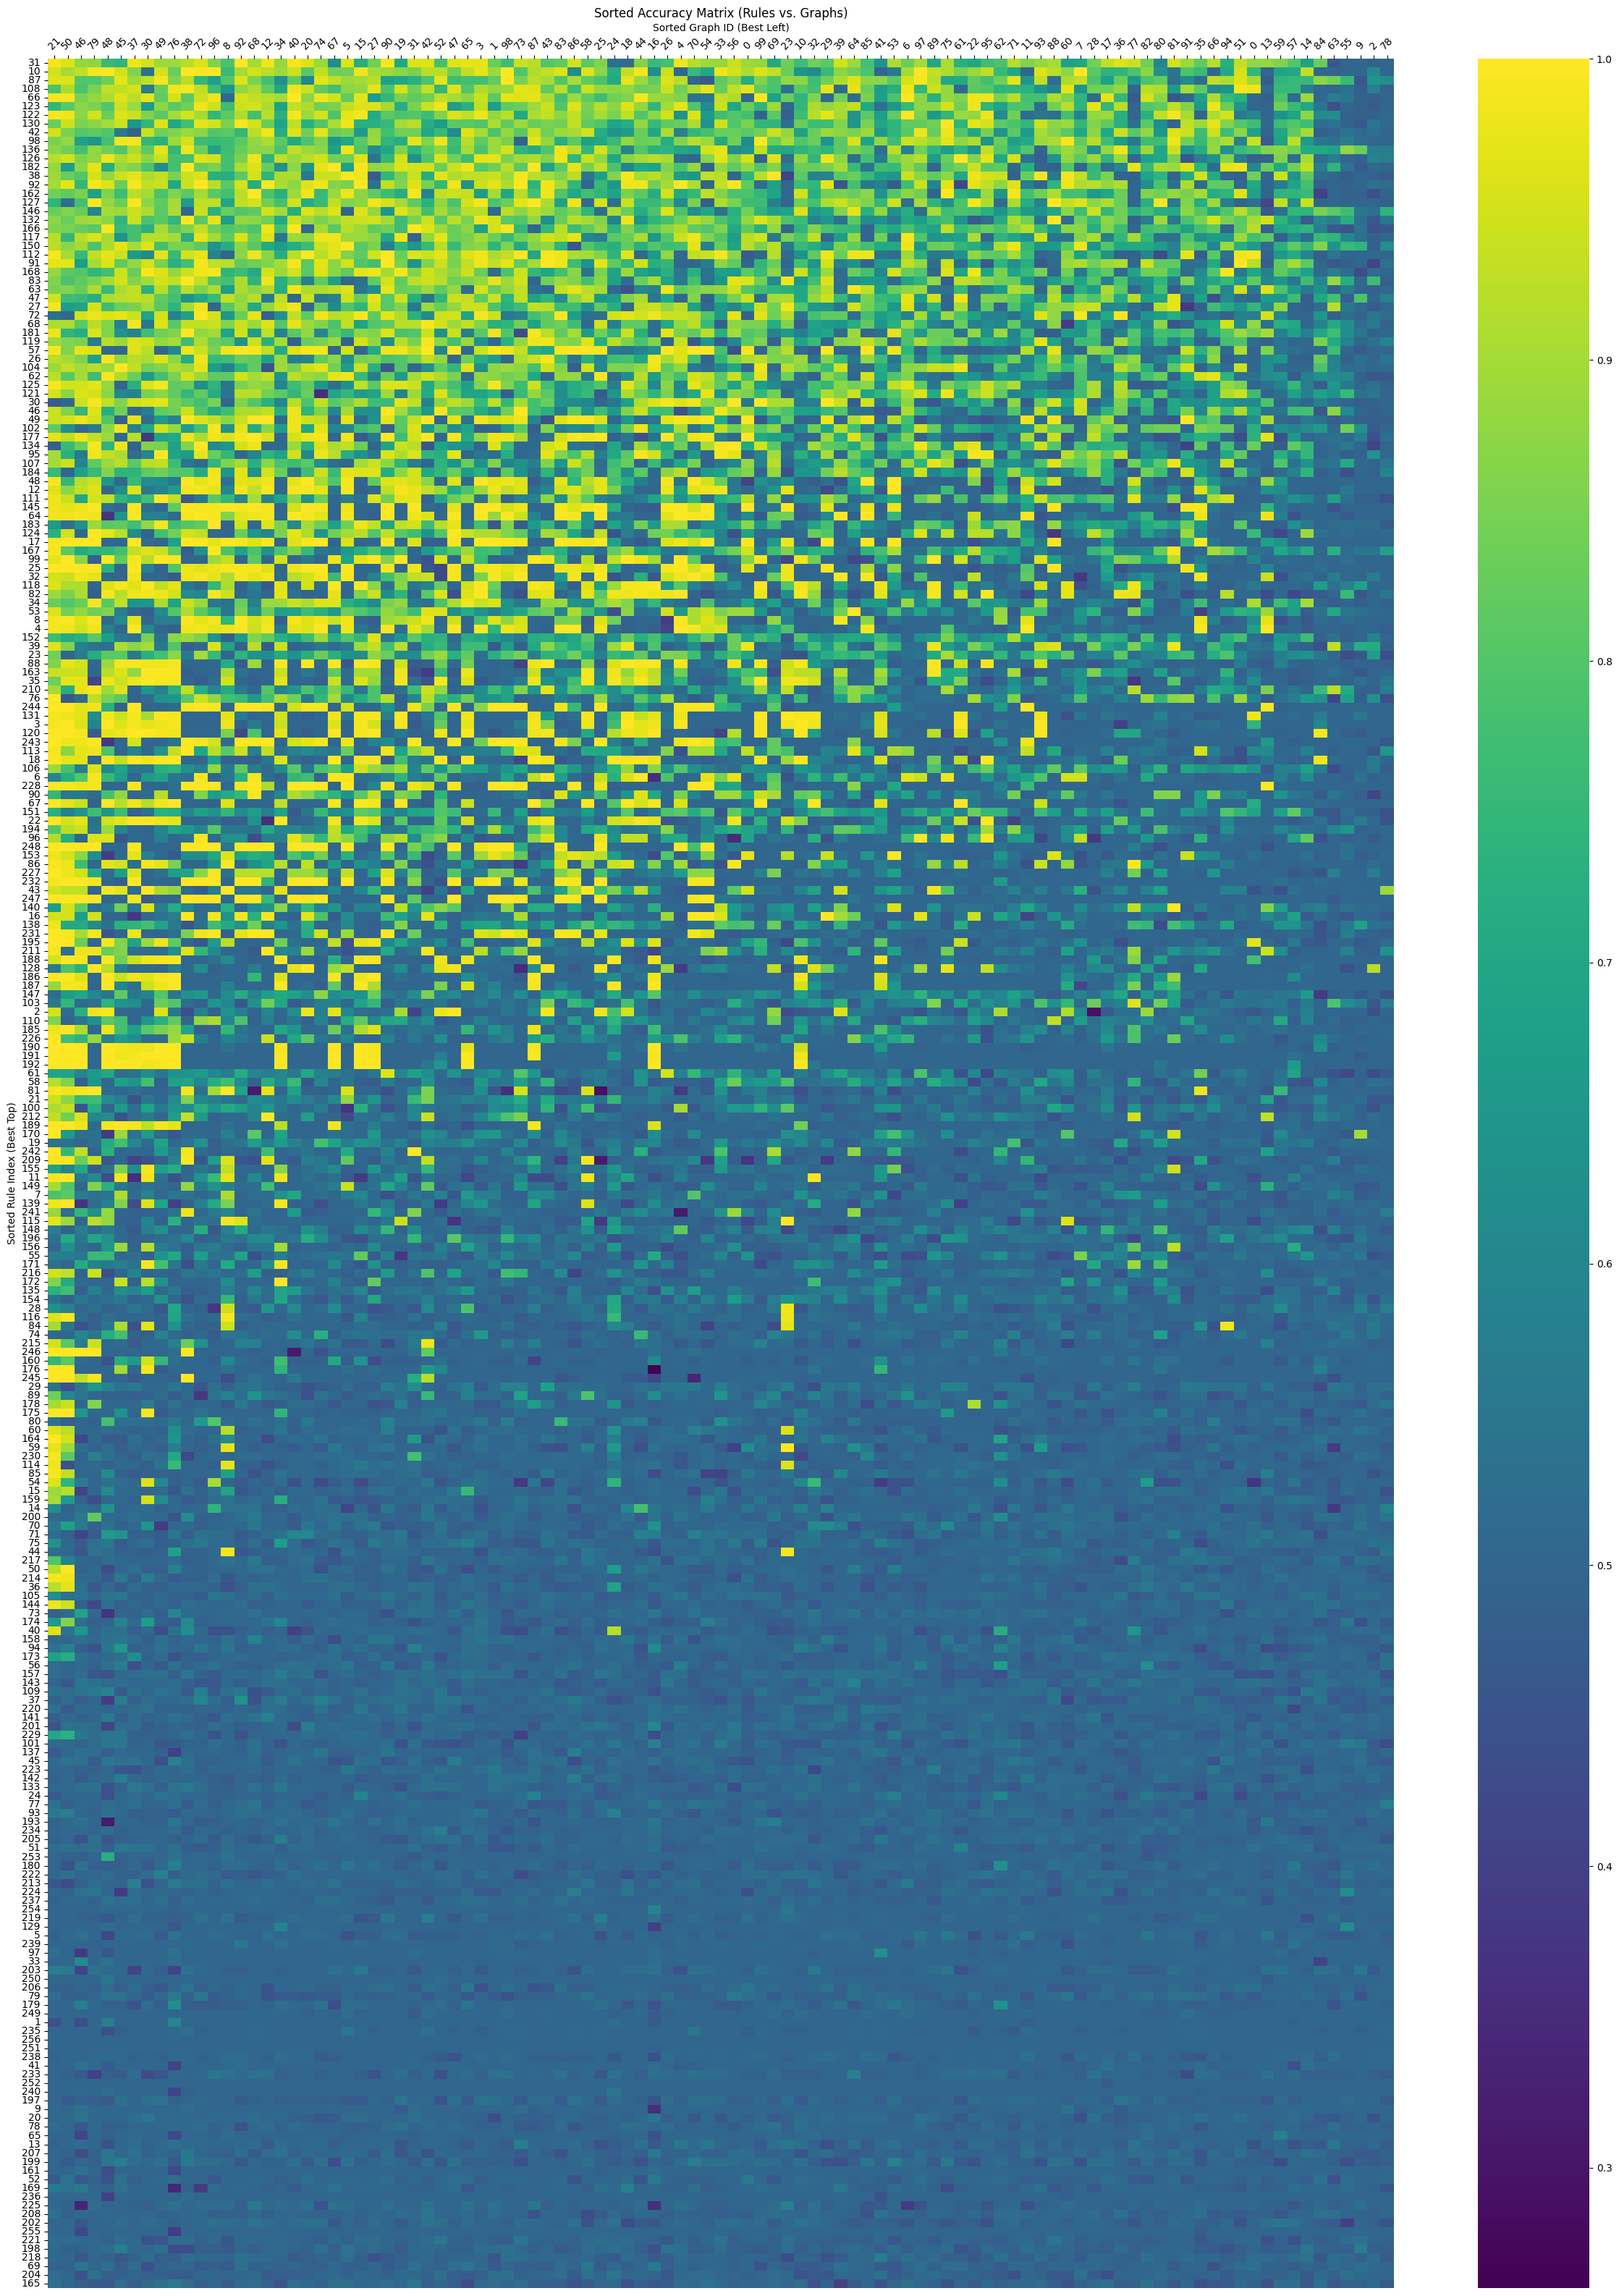

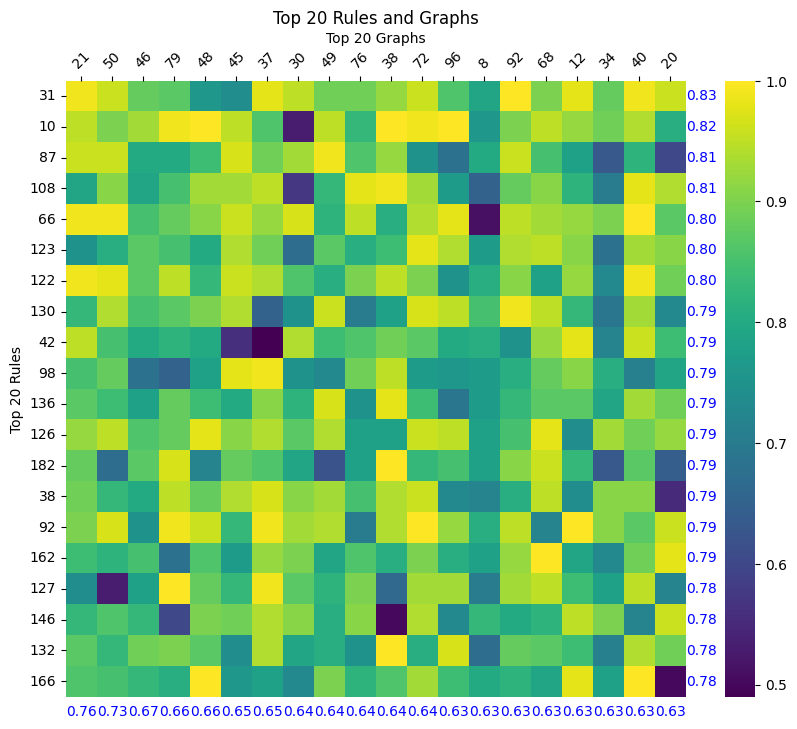

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram, leaves_list

# Step 1: Plot the original matrix
plt.figure(figsize=(20, 20))
sns.heatmap(data_corrected, cmap="viridis")
plt.title("Original Accuracy Matrix")
plt.xlabel("Rule Index")
plt.ylabel("Graph ID")
plt.show()

# Step 2: Apply clustering or hierarchical sorting
# We use hierarchical clustering to suggest an initial grouping
row_linkage = hierarchy.linkage(data_corrected, method='ward')
col_linkage = hierarchy.linkage(data_corrected.T, method='ward')

# Get the order of rows and columns after clustering
row_order = leaves_list(row_linkage)
col_order = leaves_list(col_linkage)

# Reorder the data matrix according to the clustering
sorted_data = data_corrected[row_order, :][:, col_order]
sorted_graph_ids = ids_corrected[row_order]
sorted_rule_ids = rule_ids[col_order]

# Visualize the sorted matrix
plt.figure(figsize=(40, 30))
sns.heatmap(sorted_data, cmap="viridis", xticklabels=rule_ids[col_order], yticklabels=ids_corrected[row_order])
plt.title("Sorted Accuracy Matrix")
plt.xlabel("Rule Index")
plt.ylabel("Graph ID")
plt.show()

# Instead of using leaves_list directly, we first calculate average accuracies
# Calculate average accuracy per graph (row)
row_averages = np.mean(data_corrected, axis=1)
# Sort rows based on average accuracy, best (highest) first
sorted_row_indices = np.argsort(row_averages)[::-1]

# Calculate average accuracy per rule (column)
col_averages = np.mean(data_corrected, axis=0)
# Sort columns based on average accuracy, best (highest) first
sorted_col_indices = np.argsort(col_averages)[::-1]

# Rearrange the data according to the new sorted indices
sorted_data = data_corrected[sorted_row_indices, :][:, sorted_col_indices]

# Transpose the sorted data for the new orientation
transposed_sorted_data = sorted_data.T  # Columns become rules, rows become graphs

# Plot the transposed sorted matrix
plt.figure(figsize=(30, 40))
# Note that xticklabels are graph IDs and yticklabels are rule indices now
ax = sns.heatmap(transposed_sorted_data, cmap="viridis", xticklabels=ids_corrected[sorted_row_indices], yticklabels=(sorted_col_indices + 1))
ax.set_title("Sorted Accuracy Matrix (Rules vs. Graphs)")
ax.set_xlabel("Sorted Graph ID (Best Left)")
ax.set_ylabel("Sorted Rule Index (Best Top)")
ax.xaxis.tick_top()  # Move x-axis to the top
ax.xaxis.set_label_position('top')  # Move x-axis label to the top
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal for clarity
plt.show()

row_averages_transposed = np.mean(transposed_sorted_data, axis=1)  # Averages of sorted, transposed rows
col_averages_transposed = np.mean(transposed_sorted_data, axis=0)

# Parameters
top_n = 20

top_row_averages = row_averages_transposed[:top_n]  # assuming row_averages_transposed is sorted, take the top n
top_col_averages = col_averages_transposed[:top_n]

# Create smaller matrix for top 20 items
small_sorted_data = sorted_data[:top_n, :top_n].T  # This assumes 'sorted_data' is your full sorted matrix

# Plot
plt.figure(figsize=(10, 8))
ax = sns.heatmap(small_sorted_data, cmap='viridis',
            xticklabels=ids_corrected[sorted_row_indices][:top_n],  # Update these based on your actual data labels
            yticklabels=(sorted_col_indices[:top_n] + 1)) # Likewise for rule IDs

# Add average accuracies as annotations within the cells
for i, avg in enumerate(top_col_averages):
    ax.text(i + 0.5, len(top_col_averages) + 0.5, f'{avg:.2f}', ha='center', va='center', color='blue')
for j, avg in enumerate(top_row_averages):
    ax.text(len(top_row_averages) + 0.5, j + 0.5, f'{avg:.2f}', ha='center', va='center', rotation=0, color='blue')

ax.set_title('Top 20 Rules and Graphs')
ax.set_xlabel('Top 20 Graphs')
ax.set_ylabel('Top 20 Rules')
ax.xaxis.tick_top()  # Move x-axis to the top
ax.xaxis.set_label_position('top')  # Move x-axis label to the top
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

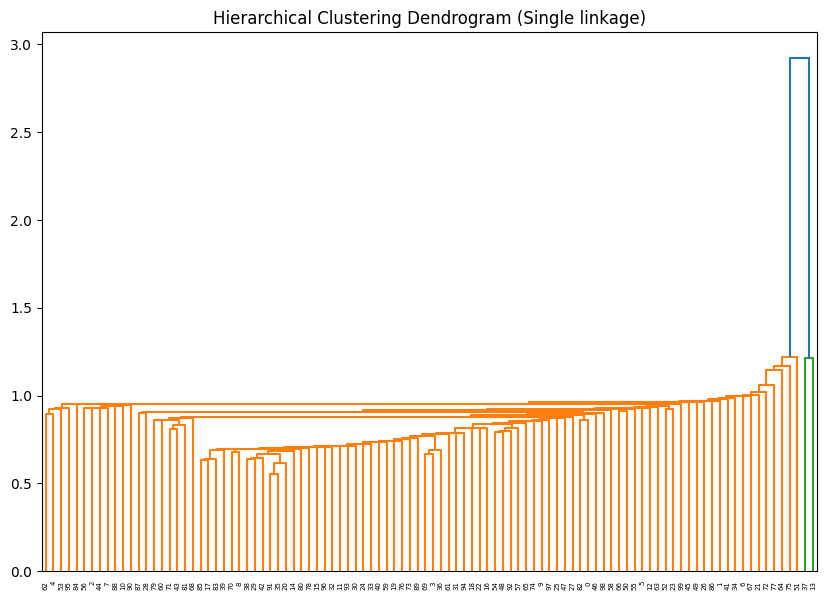

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


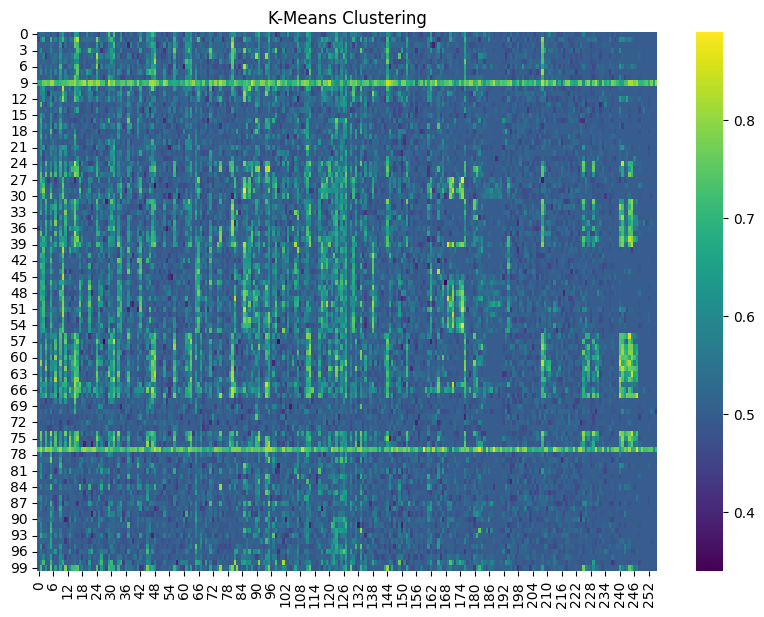

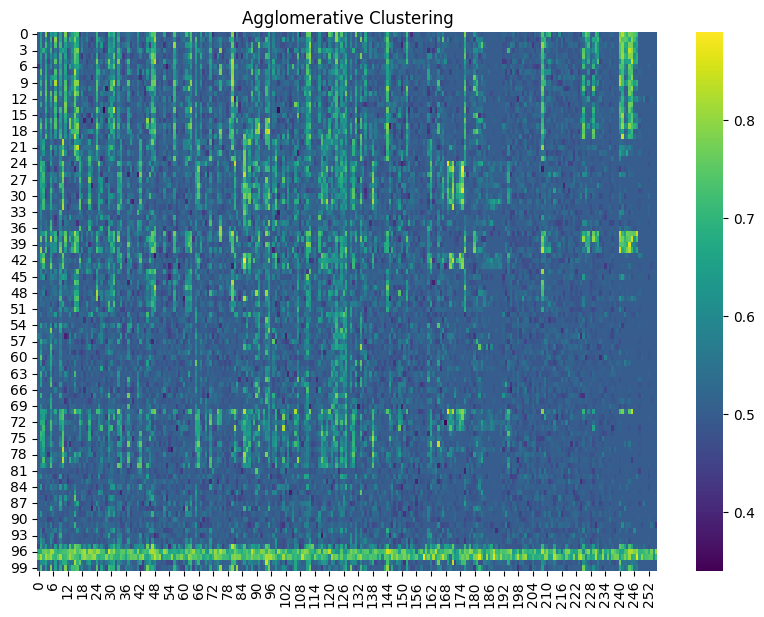

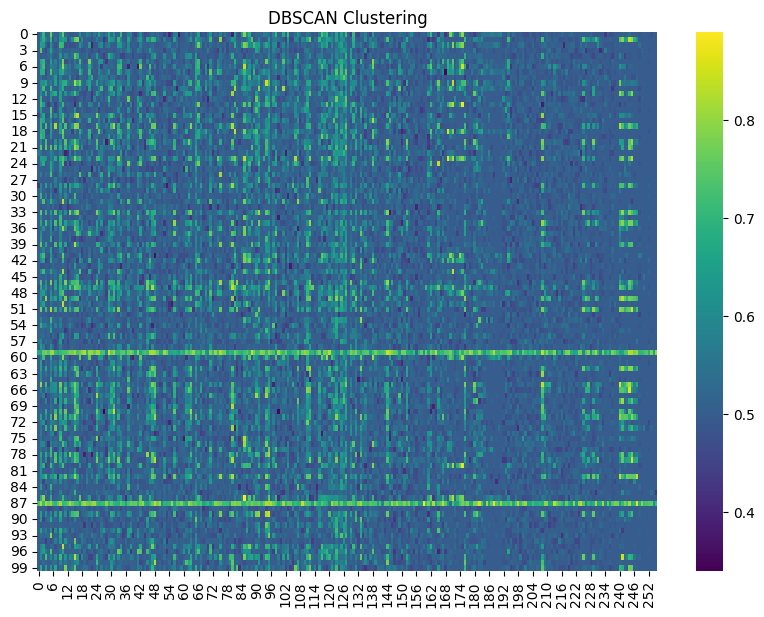

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Assuming 'data_corrected' is your matrix
# Replace 'data_corrected' with the name of your data array
# data_corrected = np.array([...])  # Your data here

# Hierarchical Clustering
plt.figure(figsize=(10, 7))
linked = linkage(data_corrected, 'single')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Single linkage)')
plt.show()

# K-Means Clustering
kmeans = KMeans(n_clusters=20)  # Adjust the number of clusters as necessary
kmeans.fit(data_corrected)
labels = kmeans.labels_
# Creating a heatmap based on K-Means clustering
clustered_data_km = data_corrected[np.argsort(labels)]
plt.figure(figsize=(10, 7))
sns.heatmap(clustered_data_km, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=20, linkage='ward')  # You can change the linkage method
agglo.fit(data_corrected)
labels_agglo = agglo.labels_
# Creating a heatmap based on Agglomerative clustering
clustered_data_agglo = data_corrected[np.argsort(labels_agglo)]
plt.figure(figsize=(10, 7))
sns.heatmap(clustered_data_agglo, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()

# DBSCAN Clustering
dbscan = DBSCAN(eps=5, min_samples=10)  # Adjust parameters as necessary
dbscan.fit(data_corrected)
labels_dbscan = dbscan.labels_
# Filter out noise (-1 labels)
filtered_labels = labels_dbscan[labels_dbscan != -1]
filtered_data = data_corrected[labels_dbscan != -1]
# Creating a heatmap based on DBSCAN clustering
clustered_data_dbscan = filtered_data[np.argsort(filtered_labels)]
plt.figure(figsize=(10, 7))
sns.heatmap(clustered_data_dbscan, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()
